## Detection of the Plant to Analyze the Growth

In [14]:
from plantcv import plantcv as pcv
import matplotlib

In [15]:
class options:
    def __init__(self):
        self.image = "p9.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "results.json"
        self.outdir = "." # Store the output to the current directory
        
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

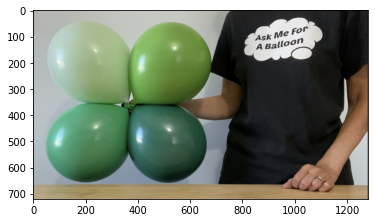

In [16]:
img, path, filename = pcv.readimage(filename=args.image)

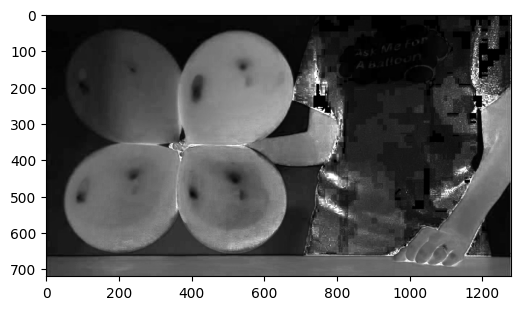

In [17]:
# Converting RGB to HSV and extract the saturation channel

s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

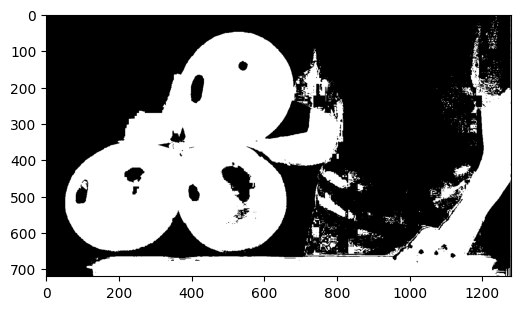

In [18]:
# Separating plant from background using binary threshold  
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

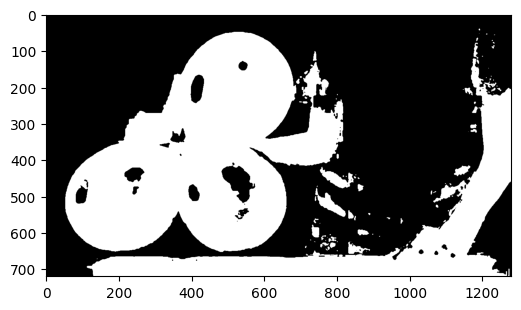

In [19]:
# Median Blur to clean noise 
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

Using multiple colorspace channels can lead to better descrimination between plant and the background in an image. 

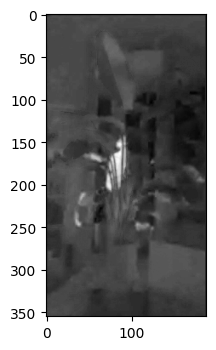

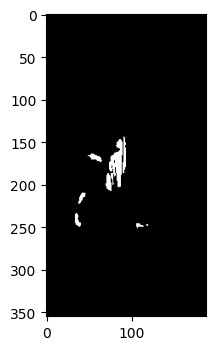

In [30]:
# Convert RGB to LAB and extract the blue channel ('b')
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

# Threshold the blue channel image 
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, 
                                object_type='light')

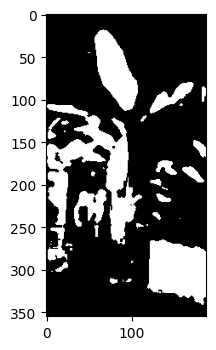

In [31]:
# Join the threshold saturation and blue-yellow images with a logical or operation 
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

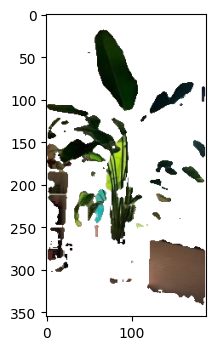

In [32]:
# Appy Mask
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')

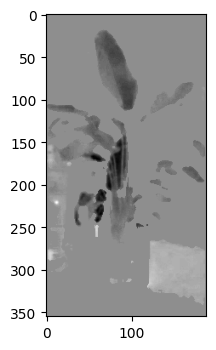

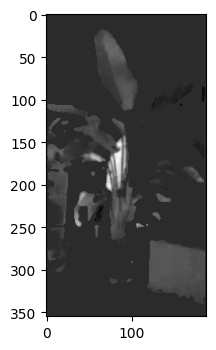

In [33]:
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

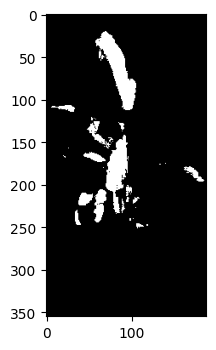

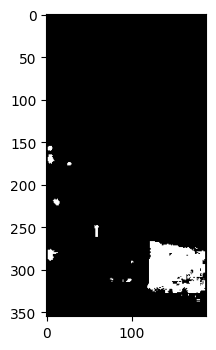

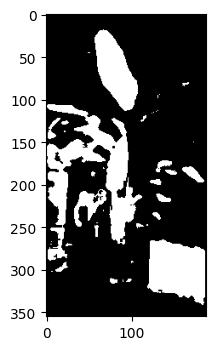

In [34]:
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
                                      max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
                                       max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')

In [35]:
import cv2
masked_thresh = cv2.threshold(masked_a, 115, 255, cv2.THRESH_BINARY)[1]

cv2.imwrite('mask_image.png', masked_thresh)


True